In [1]:
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train-2.csv')
df.head()

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.shape

(1017209, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
df2=df.reindex(index=df.index[::-1])

In [7]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1


In [8]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
4,5,5,2015-07-31,4822,559,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [9]:
atr2=df2[df2.Store==1097]

In [10]:
atr2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1
1016076,1097,3,2013-01-02,6688,1819,1,0,0,1
1014961,1097,4,2013-01-03,7053,1803,1,0,0,1
1013846,1097,5,2013-01-04,6430,1799,1,0,0,1
1012731,1097,6,2013-01-05,5460,1390,1,0,0,0


In [11]:
atr2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5556,1097,1,2015-07-27,10874,2357,1,1,0,1
4441,1097,2,2015-07-28,10225,2334,1,1,0,1
3326,1097,3,2015-07-29,10053,2296,1,1,0,1
2211,1097,4,2015-07-30,10324,2346,1,1,0,1
1096,1097,5,2015-07-31,11443,2451,1,1,0,1


In [12]:
atr2.shape

(942, 9)

In [13]:
atr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1017190 to 1096
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


In [14]:
atr2.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,942.0,942.000000,942.000000,942.000000,942.0,942.000000,942.000000
mean,1097.0,3.997877,9744.599788,2420.921444,1.0,0.382166,0.159236
std,0.0,1.998404,1900.891959,329.306198,0.0,0.486175,0.366090
min,1097.0,1.000000,5460.000000,1055.000000,1.0,0.000000,0.000000
25%,1097.0,2.000000,8486.250000,2245.750000,1.0,0.000000,0.000000
50%,1097.0,4.000000,9603.000000,2460.000000,1.0,0.000000,0.000000
75%,1097.0,6.000000,10768.750000,2619.000000,1.0,1.000000,0.000000
max,1097.0,7.000000,17039.000000,3804.000000,1.0,1.000000,1.000000


In [15]:
atr2.Sales.value_counts()

10690    3
10428    3
11166    3
11030    3
9861     3
        ..
9901     1
10185    1
10521    1
6835     1
11443    1
Name: Sales, Length: 870, dtype: int64

In [16]:
atr2=atr2.set_index('Date')

In [17]:
atr2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1097,2,5961,1405,1,0,a,1
2013-01-02,1097,3,6688,1819,1,0,0,1
2013-01-03,1097,4,7053,1803,1,0,0,1
2013-01-04,1097,5,6430,1799,1,0,0,1
2013-01-05,1097,6,5460,1390,1,0,0,0


In [18]:
atr2=atr2.drop(columns=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [19]:
atr2.head()

,Sales
Date,
2013-01-01,5961
2013-01-02,6688
2013-01-03,7053
2013-01-04,6430
2013-01-05,5460


In [20]:
atr2.tail()

,Sales
Date,
2015-07-27,10874
2015-07-28,10225
2015-07-29,10053
2015-07-30,10324
2015-07-31,11443


<AxesSubplot:xlabel='Date'>

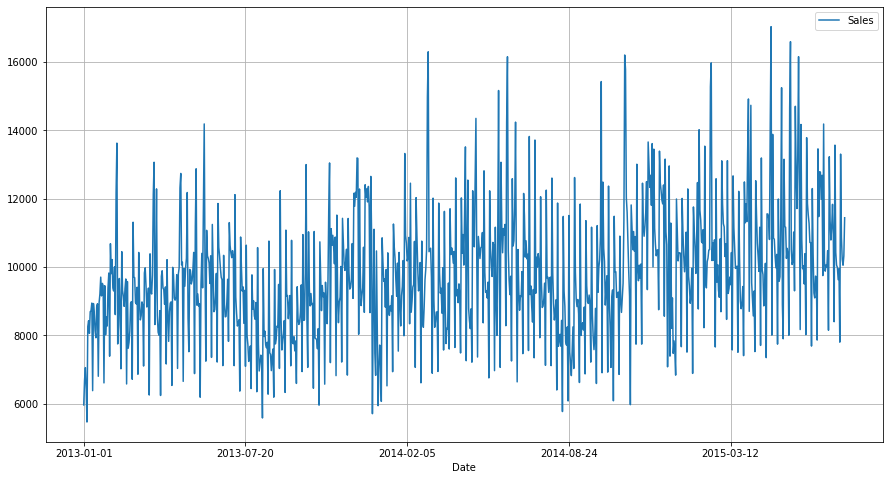

In [21]:
atr2.plot(figsize=(15,8), grid=True)

In [22]:
df1=atr2.reset_index()['Sales']

In [23]:
df1

0       5961
1       6688
2       7053
3       6430
4       5460
       ...  
937    10874
938    10225
939    10053
940    10324
941    11443
Name: Sales, Length: 942, dtype: int64

In [24]:
df1.shape

(942,)

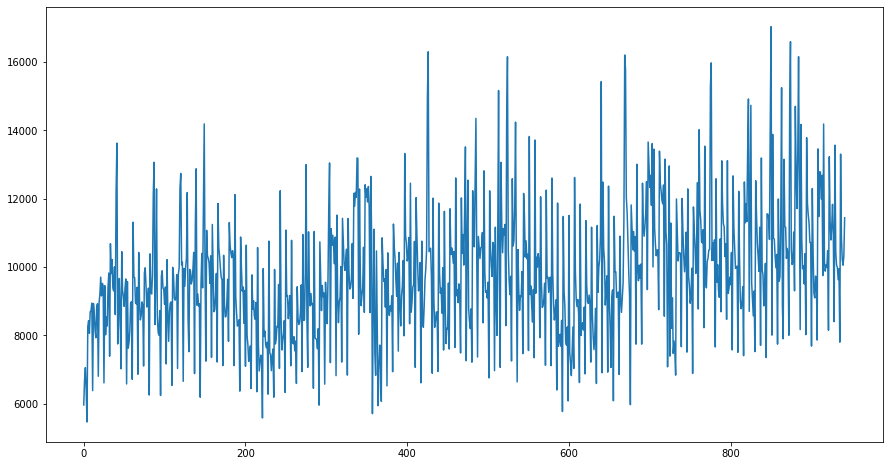

In [25]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(df1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.5,1)) ## Scaling range is btw 0-1.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
df1

array([[0.52163399],
       [0.55302703],
       [0.56878832],
       [0.54188617],
       [0.5       ],
       [0.62082218],
       [0.62807669],
       [0.61214267],
       [0.63951982],
       [0.64077209],
       [0.65044477],
       [0.53968391],
       [0.64984023],
       [0.63740392],
       [0.61564038],
       [0.60657224],
       [0.64569479],
       [0.64958114],
       [0.55786337],
       [0.65104931],
       [0.66210381],
       [0.6832628 ],
       [0.65951291],
       [0.67536057],
       [0.67255376],
       [0.54948614],
       [0.67238103],
       [0.61037223],
       [0.63282667],
       [0.62142672],
       [0.66970377],
       [0.6884446 ],
       [0.58329735],
       [0.72553761],
       [0.68762415],
       [0.70550134],
       [0.66957423],
       [0.66573106],
       [0.69621729],
       [0.63589256],
       [0.79005095],
       [0.85275067],
       [0.59875637],
       [0.62263581],
       [0.68153554],
       [0.64439934],
       [0.56732015],
       [0.715

In [28]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(612, 330)

In [30]:
train_data

array([[0.52163399],
       [0.55302703],
       [0.56878832],
       [0.54188617],
       [0.5       ],
       [0.62082218],
       [0.62807669],
       [0.61214267],
       [0.63951982],
       [0.64077209],
       [0.65044477],
       [0.53968391],
       [0.64984023],
       [0.63740392],
       [0.61564038],
       [0.60657224],
       [0.64569479],
       [0.64958114],
       [0.55786337],
       [0.65104931],
       [0.66210381],
       [0.6832628 ],
       [0.65951291],
       [0.67536057],
       [0.67255376],
       [0.54948614],
       [0.67238103],
       [0.61037223],
       [0.63282667],
       [0.62142672],
       [0.66970377],
       [0.6884446 ],
       [0.58329735],
       [0.72553761],
       [0.68762415],
       [0.70550134],
       [0.66957423],
       [0.66573106],
       [0.69621729],
       [0.63589256],
       [0.79005095],
       [0.85275067],
       [0.59875637],
       [0.62263581],
       [0.68153554],
       [0.64439934],
       [0.56732015],
       [0.715

In [31]:
test_data

array([[0.63662665],
       [0.55000432],
       [0.77571466],
       [0.60950859],
       [0.62203126],
       [0.62561534],
       [0.61641765],
       [0.64539252],
       [0.56084291],
       [0.75468521],
       [0.67259694],
       [0.6522584 ],
       [0.64996977],
       [0.66059245],
       [0.64880387],
       [0.57578375],
       [0.74639433],
       [0.63615165],
       [0.60791087],
       [0.59158822],
       [0.60955177],
       [0.6437948 ],
       [0.54875205],
       [0.74842387],
       [0.66404698],
       [0.69556957],
       [0.70524225],
       [0.73430348],
       [0.93060713],
       [0.56231108],
       [0.80348044],
       [0.71979446],
       [0.70295362],
       [0.64794024],
       [0.67242422],
       [0.68494689],
       [0.56313153],
       [0.79838501],
       [0.65066068],
       [0.61948355],
       [0.5690906 ],
       [0.65709474],
       [0.6670697 ],
       [0.52685897],
       [0.76021245],
       [0.69004232],
       [0.69004232],
       [0.657

In [32]:
len(train_data), len(test_data)

(612, 330)

In [33]:
atr2.iloc[0:612] #train

,Sales
Date,
2013-01-01,5961
2013-01-02,6688
2013-01-03,7053
2013-01-04,6430
2013-01-05,5460
...,...
2014-08-31,12621
2014-09-01,9858
2014-09-02,9071


Train ranges from the date 2013/01/01 to 2014/09/04

In [34]:
atr2.iloc[612:]  #test

,Sales
Date,
2014-09-05,8624
2014-09-06,6618
2014-09-07,11845
2014-09-08,7996
2014-09-09,8286
...,...
2015-07-27,10874
2015-07-28,10225
2015-07-29,10053


Test ranges from the date 2014/09/05 to 2015/07/31

In [35]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train)

[[0.52163399 0.55302703 0.56878832 ... 0.69129459 0.66957423 0.66737197]
 [0.55302703 0.56878832 0.54188617 ... 0.66957423 0.66737197 0.6489766 ]
 [0.56878832 0.54188617 0.5        ... 0.66737197 0.6489766  0.67086968]
 ...
 [0.56498834 0.74639433 0.65476293 ... 0.620304   0.56770878 0.80922359]
 [0.74639433 0.65476293 0.60955177 ... 0.56770878 0.80922359 0.68991277]
 [0.65476293 0.60955177 0.73780119 ... 0.80922359 0.68991277 0.65592884]]


In [38]:
print(y_train)

[0.6489766  0.67086968 0.57340876 0.70532861 0.6358062  0.60203817
 0.639563   0.65027204 0.65195613 0.5462907  0.69565593 0.68615597
 0.65679247 0.65411521 0.65839019 0.68624234 0.56779515 0.68719233
 0.69526729 0.79609638 0.81440539 0.69880819 0.70221954 0.55142931
 0.69410139 0.67177649 0.69522411 0.70714224 0.79026686 0.6310994
 0.58895414 0.69302185 0.69142413 0.6745833  0.67907419 0.69276276
 0.7145263  0.56123154 0.74799205 0.82027809 0.64776751 0.66201745
 0.64677433 0.64953796 0.53139304 0.67376285 0.71327403 0.66974696
 0.77079195 0.87701874 0.68999914 0.57699283 0.74246481 0.71003541
 0.7070127  0.70131272 0.6752742  0.71016495 0.58174281 0.74989205
 0.69755592 0.63951982 0.64219708 0.65955609 0.6879696  0.57587011
 0.77636238 0.72104672 0.70977632 0.69470593 0.6830469  0.68002418
 0.57133604 0.71081268 0.64858796 0.63295621 0.63364712 0.65217204
 0.68058554 0.60203817 0.75222385 0.7232058  0.71370585 0.70787633
 0.71677174 0.71059677 0.57129286 0.7875896  0.65817428 0.63770

In [39]:
print(X_train.shape), print(y_train.shape)

(511, 100)
(511,)


(None, None)

In [40]:
print(X_test.shape), print(ytest.shape)

(229, 100)
(229,)


(None, None)

In [41]:
X_train.shape

(511, 100)

In [42]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1] )
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [43]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model=Sequential()
model.add(LSTM(50, input_shape=(1,100)))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam', metrics=['mape'])

2022-03-23 23:32:56.168416: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-23 23:32:56.169371: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 32,801
Trainable params: 32,801
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-23 23:33:01.503491: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_2436_2618' and '__inference___backward_standard_lstm_2741_3226_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_3347' both implement 'lstm_ff202285-aea8-4b87-a20d-22f6abfd948d' but their signatures do not match.


 64/511 [==>...........................] - ETA: 12s - loss: 0.5072 - mape: 74.8481

2022-03-23 23:33:02.698526: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_3564' and '__inference_standard_lstm_3564_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_3925' both implement 'lstm_beb60915-71ad-4dec-b340-d56d40cf547b' but their signatures do not match.


511/511 [==============================] - 2s 5ms/sample - loss: 0.2330 - mape: 34.4134 - val_loss: 0.1437 - val_mape: 21.1592
Epoch 2/150
511/511 [==============================] - 0s 168us/sample - loss: 0.0988 - mape: 15.2157 - val_loss: 0.1070 - val_mape: 13.8666
Epoch 3/150
511/511 [==============================] - 0s 167us/sample - loss: 0.0705 - mape: 10.3136 - val_loss: 0.0730 - val_mape: 10.4394
Epoch 4/150
511/511 [==============================] - 0s 167us/sample - loss: 0.0669 - mape: 10.0969 - val_loss: 0.0794 - val_mape: 10.3387
Epoch 5/150
511/511 [==============================] - 0s 166us/sample - loss: 0.0623 - mape: 9.3173 - val_loss: 0.0644 - val_mape: 8.7228
Epoch 6/150
511/511 [==============================] - 0s 169us/sample - loss: 0.0590 - mape: 8.7548 - val_loss: 0.0679 - val_mape: 8.9895
Epoch 7/150
511/511 [==============================] - 0s 168us/sample - loss: 0.0595 - mape: 8.8792 - val_loss: 0.0634 - val_mape: 8.5778
Epoch 8/150
511/511 [============

In [47]:
modela=Sequential()
modela.add(LSTM(30, input_shape=(1,100)))
modela.add(Dense(30,activation='relu'))
modela.add(Dense(1))
modela.compile(loss='mae',optimizer='adam', metrics=['mape'])

In [48]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                15720     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 16,681
Trainable params: 16,681
Non-trainable params: 0
_________________________________________________________________


In [49]:
modela.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-23 23:35:21.128252: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_13082_13567_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_13688' and '__inference___backward_cudnn_lstm_with_fallback_12777_12959' both implement 'lstm_2084a9f9-1523-4b04-85d1-4a3c00cb2f97' but their signatures do not match.


 64/511 [==>...........................] - ETA: 11s - loss: 0.5413 - mape: 81.8046

2022-03-23 23:35:22.286105: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_13905_specialized_for_sequential_1_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_14266' and '__inference_standard_lstm_13905' both implement 'lstm_eec79d1c-a0d9-44cd-bf4b-0e23ba700d09' but their signatures do not match.


511/511 [==============================] - 2s 4ms/sample - loss: 0.2719 - mape: 40.1005 - val_loss: 0.1086 - val_mape: 16.0023
Epoch 2/150
511/511 [==============================] - 0s 157us/sample - loss: 0.1081 - mape: 17.0876 - val_loss: 0.0806 - val_mape: 10.4711
Epoch 3/150
511/511 [==============================] - 0s 142us/sample - loss: 0.0757 - mape: 10.6586 - val_loss: 0.0687 - val_mape: 9.0433
Epoch 4/150
511/511 [==============================] - 0s 154us/sample - loss: 0.0639 - mape: 9.8397 - val_loss: 0.0683 - val_mape: 8.9220
Epoch 5/150
511/511 [==============================] - 0s 150us/sample - loss: 0.0596 - mape: 8.6158 - val_loss: 0.0613 - val_mape: 8.3529
Epoch 6/150
511/511 [==============================] - 0s 140us/sample - loss: 0.0600 - mape: 9.1508 - val_loss: 0.0754 - val_mape: 9.7496
Epoch 7/150
511/511 [==============================] - 0s 134us/sample - loss: 0.0575 - mape: 8.3522 - val_loss: 0.0619 - val_mape: 8.3110
Epoch 8/150
511/511 [===============

***Let's Hypertune***

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
!pip install -q -U keras-tuner

In [52]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [53]:
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dropout

***Hypertune***

In [54]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=30,max_value=300,step=30),return_sequences=True, input_shape=(1,100)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=30,max_value=300,step=30),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=30,max_value=300,step=30)))
    model.add(Dense(hp.Int(f'rnn_{i}_units',min_value=16,max_value=256,step=16),activation="relu"))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mae',metrics=['mape'])
    return model

In [55]:
tuner= RandomSearch(
        build_model,
        objective='mape',
        max_trials=5,
        executions_per_trial=3,
        directory='proj3df',
        project_name='Rossmann forecasting'
        )

In [56]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
lstm_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
rnn_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [57]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,ytest),
)

Trial 5 Complete [00h 02m 29s]
mape: 15.978652000427246

Best mape So Far: 8.861736297607422
Total elapsed time: 00h 11m 30s
INFO:tensorflow:Oracle triggered exit


In [58]:
tuner.results_summary()

Results summary
Results in proj3df/Rossmann forecasting
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 60
n_layers: 4
lstm_0_units: 210
layer_2_neurons: 60
rnn_0_units: 48
Dropout_rate: 0.30000000000000004
learning_rate: 0.01
lstm_1_units: 240
lstm_2_units: 60
rnn_2_units: 144
lstm_3_units: 30
rnn_3_units: 16
Score: 8.861736297607422
Trial summary
Hyperparameters:
input_unit: 210
n_layers: 3
lstm_0_units: 90
layer_2_neurons: 210
rnn_0_units: 192
Dropout_rate: 0.2
learning_rate: 0.0001
lstm_1_units: 150
lstm_2_units: 240
rnn_2_units: 160
Score: 9.694279670715332
Trial summary
Hyperparameters:
input_unit: 60
n_layers: 4
lstm_0_units: 270
layer_2_neurons: 300
rnn_0_units: 208
Dropout_rate: 0.2
learning_rate: 0.0001
lstm_1_units: 240
lstm_2_units: 270
rnn_2_units: 96
lstm_3_units: 210
rnn_3_units: 64
Score: 11.034773826599121
Trial summary
Hyperparameters:
input_unit: 240
n_layers: 4
lstm_0_units: 150
layer_2_neurons: 30
rnn_0_units: 224
Dropout_rate: 0.4
learning_rate: 

In [59]:
from tensorflow.keras import optimizers

In [60]:
modelcc=Sequential()
modelcc.add(LSTM(60, return_sequences=True, input_shape=(1,100)))
modelcc.add(LSTM(210, return_sequences=True))
modelcc.add(LSTM(240, return_sequences=True))
modelcc.add(LSTM(60, return_sequences=True))
modelcc.add(LSTM(30, return_sequences=True))
modelcc.add(LSTM(60))
modelcc.add(Dense(48, activation='relu'))
modelcc.add(Dropout(0.3))
modelcc.add(Dense(144, activation='relu'))
modelcc.add(Dense(16, activation='relu'))
modelcc.add(Dense(1))
sgd=optimizers.SGD(lr=0.01)
modelcc.compile(loss='mae',optimizer='adam', metrics=['mape'])

In [61]:
modelcc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 60)             38640     
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 210)            227640    
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 240)            432960    
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 60)             72240     
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 30)             10920     
_________________________________________________________________
lstm_11 (LSTM)               (None, 60)                21840     
_________________________________________________________________
dense_2 (Dense)              (None, 48)               

In [62]:
modelcc.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-23 23:53:43.244542: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_355842_356024' and '__inference___backward_standard_lstm_361198_361683_specialized_for_StatefulPartitionedCall_5_at___inference_distributed_function_361880' both implement 'lstm_79df9806-b810-4869-90a7-d5d50ec3de06' but their signatures do not match.


448/511 [=========================>....] - ETA: 1s - loss: 0.6428 - mape: 95.5826

2022-03-23 23:53:49.127009: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_362566' and '__inference_standard_lstm_362566_specialized_for_sequential_1_lstm_7_StatefulPartitionedCall_at___inference_distributed_function_364818' both implement 'lstm_0f60bdcf-d337-4a5c-94c3-4121a19d3d6a' but their signatures do not match.


511/511 [==============================] - 11s 21ms/sample - loss: 0.6370 - mape: 94.7210 - val_loss: 0.6343 - val_mape: 87.3718
Epoch 2/150
511/511 [==============================] - 0s 876us/sample - loss: 0.5190 - mape: 76.9462 - val_loss: 0.4699 - val_mape: 64.3960
Epoch 3/150
511/511 [==============================] - 0s 802us/sample - loss: 0.2814 - mape: 41.2576 - val_loss: 0.0743 - val_mape: 9.7392
Epoch 4/150
511/511 [==============================] - 0s 804us/sample - loss: 0.1202 - mape: 18.6946 - val_loss: 0.0809 - val_mape: 10.5376
Epoch 5/150
511/511 [==============================] - 0s 822us/sample - loss: 0.0820 - mape: 11.7909 - val_loss: 0.0986 - val_mape: 12.7921
Epoch 6/150
511/511 [==============================] - 0s 800us/sample - loss: 0.0748 - mape: 11.2703 - val_loss: 0.0673 - val_mape: 8.9507
Epoch 7/150
511/511 [==============================] - 0s 797us/sample - loss: 0.0715 - mape: 10.7003 - val_loss: 0.0953 - val_mape: 12.3650
Epoch 8/150
511/511 [======

In [63]:
#Lets Do the prediction and check performance metrics
train_predict=modela.predict(X_train)
test_predict=modela.predict(X_test)

2022-03-23 23:56:25.998470: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_371474' and '__inference_standard_lstm_371474_specialized_for_sequential_1_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_371783' both implement 'lstm_513c2ce5-b1a1-4d2f-84fd-f6ae2857c469' but their signatures do not match.


In [64]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [65]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9857.314110907064

In [66]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

10677.749580251164

In [67]:
print(test_predict)

[[12944.707 ]
 [10863.889 ]
 [11572.798 ]
 [11728.1045]
 [11618.81  ]
 [11840.944 ]
 [ 9673.432 ]
 [13774.273 ]
 [11059.594 ]
 [10751.57  ]
 [10441.387 ]
 [ 9169.3955]
 [11375.2   ]
 [ 9031.681 ]
 [12929.32  ]
 [10961.923 ]
 [10987.605 ]
 [10413.951 ]
 [10638.895 ]
 [11293.75  ]
 [ 7280.318 ]
 [11935.449 ]
 [ 9605.782 ]
 [10132.092 ]
 [ 9294.257 ]
 [ 9491.697 ]
 [10571.34  ]
 [ 7768.765 ]
 [12533.641 ]
 [ 9555.822 ]
 [ 9586.549 ]
 [ 9786.216 ]
 [10113.576 ]
 [11126.885 ]
 [ 7518.4775]
 [12602.631 ]
 [10421.697 ]
 [10255.357 ]
 [ 9801.625 ]
 [10121.957 ]
 [10605.67  ]
 [ 7957.241 ]
 [11897.761 ]
 [ 9966.692 ]
 [ 9986.582 ]
 [ 9324.121 ]
 [ 9808.364 ]
 [11156.671 ]
 [ 8751.381 ]
 [12422.187 ]
 [10614.126 ]
 [10972.142 ]
 [10752.843 ]
 [10540.595 ]
 [10798.594 ]
 [ 7788.7646]
 [12649.909 ]
 [10134.639 ]
 [10259.031 ]
 [ 9806.735 ]
 [10038.49  ]
 [11023.859 ]
 [ 8273.821 ]
 [13385.859 ]
 [10893.092 ]
 [11339.673 ]
 [10318.918 ]
 [10490.957 ]
 [10970.098 ]
 [ 7827.353 ]
 [12724.589 ]
 [1044

In [68]:
len(train_predict)

511

In [69]:
len(test_predict)

229

In [70]:
test_data.shape

(330, 1)

In [71]:
test_predict.shape

(229, 1)

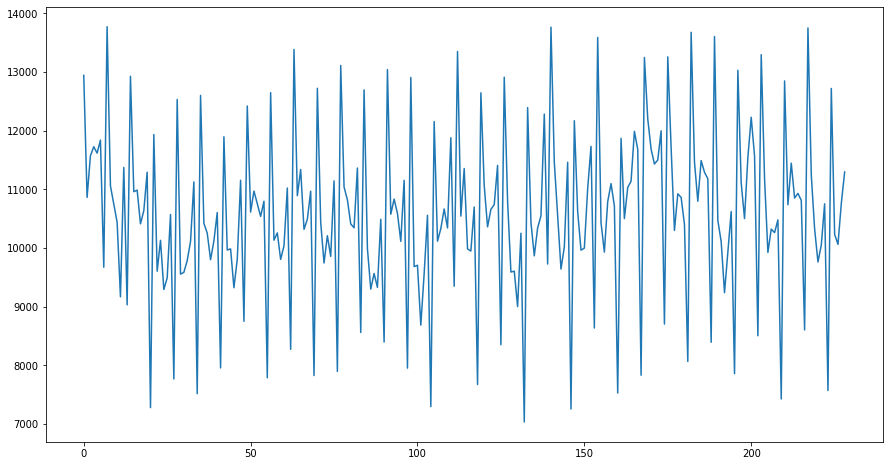

In [72]:
plt.plot(test_predict)

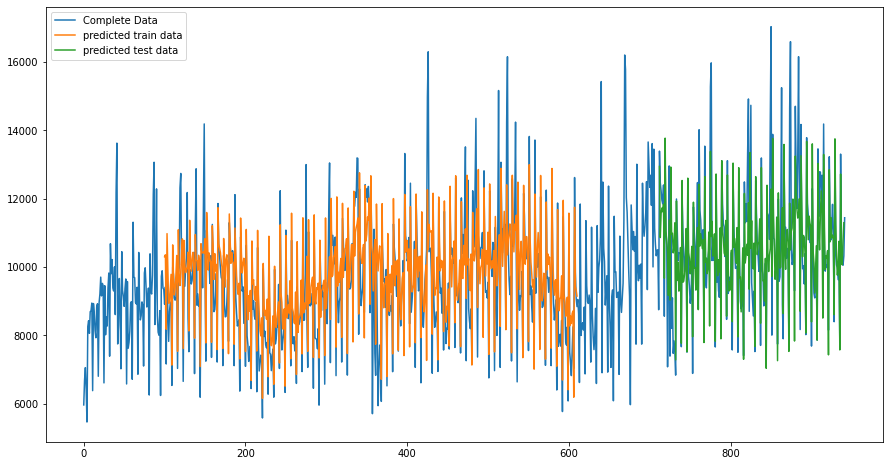

In [73]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Complete Data')
plt.plot(trainPredictPlot, label='predicted train data')
plt.plot(testPredictPlot, label='predicted test data')
plt.legend()
plt.show()

In [74]:
len(test_data)

330

In [75]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 100)

In [76]:
temp_input=list(x_input) # converting to a list
temp_input=temp_input[0].tolist() # storing the values here

In [77]:
temp_input #All my test_data is present here (previous 100 days data)

[0.6643924345798429,
 0.7007081785991882,
 0.5814405389066413,
 0.7632783487347785,
 0.7630192590033682,
 0.7575783746437517,
 0.7308489506865878,
 0.878314189480957,
 1.0,
 0.6099404093617756,
 0.8638483461438812,
 0.7324466706969514,
 0.7312375852837032,
 0.7097331375766474,
 0.6950082045081614,
 0.7120217635374384,
 0.5985404611797218,
 0.7820623542620261,
 0.6780810087226876,
 0.6836514379480093,
 0.7591329130322135,
 0.9228344416616289,
 0.6482425079886001,
 0.60527679419639,
 0.8323257621556266,
 0.7473443302530443,
 0.7462647897055013,
 0.7069695137749374,
 0.7196217289921409,
 0.7111149494775024,
 0.6097676828741687,
 0.8967959236548925,
 0.9810432679851455,
 0.7180671906036791,
 0.6992400034545297,
 0.7036877105104067,
 0.7403489075049658,
 0.6659469729683047,
 0.8993436393470939,
 0.8158303825891701,
 0.7700146817514466,
 0.8371189221867174,
 0.962086535970291,
 0.7823646256153381,
 0.6169790137317557,
 0.8763278348734779,
 0.7306330425770792,
 0.6938854823387166,
 0.69777182

In [78]:
len(temp_input)

100

In [79]:
# demonstrate prediction for next 80 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<80):
    
    if(len(temp_input)>100): # Now if there are greater than 100 elements, start from the 1st index element
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1,n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps)) # All the previous 100 days data will be passed here
        yhat = model.predict(x_input, verbose=0) # it will be predicted here
        print(yhat[0]) # I obtain my yhat value
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # Now I'm adding my yhat value inside my final o/p i.e lst_output
        i=i+1                            # Now I'm also adding my yhat value in my previous i/p i.e temp_input
                                         # Now temp_input will have 101 elements.
    

print(lst_output)

2022-03-23 23:56:38.543363: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_372099' and '__inference_standard_lstm_372099_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_372408' both implement 'lstm_2c5ab9ff-db02-4c0d-a35b-8167aab046ce' but their signatures do not match.


[0.6057478]
101
1 day input [0.70070818 0.58144054 0.76327835 0.76301926 0.75757837 0.73084895
 0.87831419 1.         0.60994041 0.86384835 0.73244667 0.73123759
 0.70973314 0.6950082  0.71202176 0.59854046 0.78206235 0.67808101
 0.68365144 0.75913291 0.92283444 0.64824251 0.60527679 0.83232576
 0.74734433 0.74626479 0.70696951 0.71962173 0.71111495 0.60976768
 0.89679592 0.98104327 0.71806719 0.69924    0.70368771 0.74034891
 0.66594697 0.89934364 0.81583038 0.77001468 0.83711892 0.96208654
 0.78236463 0.61697901 0.87632783 0.73063304 0.69388548 0.69777183
 0.67462648 0.71297176 0.61050177 0.85961655 0.77636238 0.76176699
 0.75127386 0.72713533 0.72678988 0.59607911 0.79527593 0.71249676
 0.66309699 0.6569652  0.68451507 0.68352189 0.60367907 0.84545298
 0.75982382 0.81660765 0.81600311 0.78210554 0.81211676 0.68520598
 0.8768892  0.7027809  0.69081959 0.69867864 0.69582866 0.71677174
 0.61611538 0.83547802 0.75498748 0.73020123 0.74730115 0.77532602
 0.73387166 0.62686761 0.85020295 

In [80]:
lst_output

[[0.6057478189468384],
 [0.8359910845756531],
 [0.7082123756408691],
 [0.6931049823760986],
 [0.669217050075531],
 [0.6696921586990356],
 [0.6695966124534607],
 [0.5381794571876526],
 [0.7709296941757202],
 [0.6421430706977844],
 [0.6267874836921692],
 [0.636067807674408],
 [0.6697645783424377],
 [0.6799811720848083],
 [0.5661194920539856],
 [0.7729439735412598],
 [0.6493046283721924],
 [0.6433188915252686],
 [0.64389568567276],
 [0.6503052115440369],
 [0.6267086863517761],
 [0.5186663269996643],
 [0.7532870173454285],
 [0.6263812780380249],
 [0.6163510680198669],
 [0.6058198809623718],
 [0.6096407771110535],
 [0.6499636769294739],
 [0.5497792959213257],
 [0.7738499045372009],
 [0.6375305652618408],
 [0.6176603436470032],
 [0.6182532906532288],
 [0.6343066096305847],
 [0.6544675230979919],
 [0.530616283416748],
 [0.7377966046333313],
 [0.6006366610527039],
 [0.6019813418388367],
 [0.6038902997970581],
 [0.6122466921806335],
 [0.6288704872131348],
 [0.5162796378135681],
 [0.751738488674

In [81]:
len(lst_output)

80

In [82]:
fnl_output=scaler.inverse_transform(lst_output)

In [83]:
fnl_output

array([[ 7908.90799117],
       [13240.8815366 ],
       [10281.78219509],
       [ 9931.92518187],
       [ 9378.72844565],
       [ 9389.73101115],
       [ 9387.5183512 ],
       [ 6344.15986955],
       [11734.18985772],
       [ 8751.74923122],
       [ 8396.14454734],
       [ 8611.05829012],
       [ 9391.40810525],
       [ 9628.00398314],
       [ 6991.19519699],
       [11780.83653927],
       [ 8917.59658384],
       [ 8778.97888994],
       [ 8792.33628881],
       [ 8940.76808894],
       [ 8394.31975853],
       [ 5892.27480066],
       [11325.62074769],
       [ 8386.7376368 ],
       [ 8154.4580332 ],
       [ 7910.57680333],
       [ 7999.06111634],
       [ 8932.85883033],
       [ 6612.78893495],
       [11801.81608927],
       [ 8644.93283033],
       [ 8184.77823818],
       [ 8198.50970495],
       [ 8570.27246583],
       [ 9037.1588999 ],
       [ 6169.01189137],
       [10966.8937701 ],
       [ 7790.54379666],
       [ 7821.6839143 ],
       [ 7865.8915627 ],


In [84]:
import matplotlib.pyplot as plt

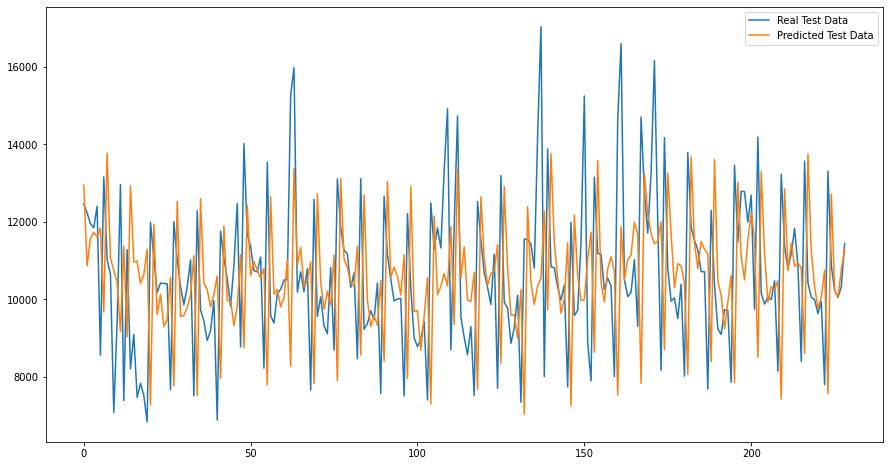

In [85]:
plt.plot(scaler.inverse_transform(df1[713:]),label='Real Test Data')
plt.plot(test_predict, label='Predicted Test Data')
plt.legend()
plt.show()

In [86]:
date = pd.date_range(start='2015/08/01', periods=80, freq='D')
date

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01',
               '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05',
               '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09',
               '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13',
               '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20', '2015-09-21',
               '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25',
      

In [87]:
ff=pd.DataFrame(fnl_output, columns=['Forecast'])

In [88]:
ff

,Forecast
0,7908.907991
1,13240.881537
2,10281.782195
3,9931.925182
4,9378.728446
...,...
75,7865.304925
76,8665.131117
77,5820.041046
78,10928.865834


In [89]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [90]:
ff

,Forecast,Time_Stamp
0,7908.907991,2015-08-01
1,13240.881537,2015-08-02
2,10281.782195,2015-08-03
3,9931.925182,2015-08-04
4,9378.728446,2015-08-05
...,...,...
75,7865.304925,2015-10-15
76,8665.131117,2015-10-16
77,5820.041046,2015-10-17
78,10928.865834,2015-10-18


In [91]:
ff=ff.set_index('Time_Stamp')

In [92]:
ff

,Forecast
Time_Stamp,
2015-08-01,7908.907991
2015-08-02,13240.881537
2015-08-03,10281.782195
2015-08-04,9931.925182
2015-08-05,9378.728446
...,...
2015-10-15,7865.304925
2015-10-16,8665.131117
2015-10-17,5820.041046


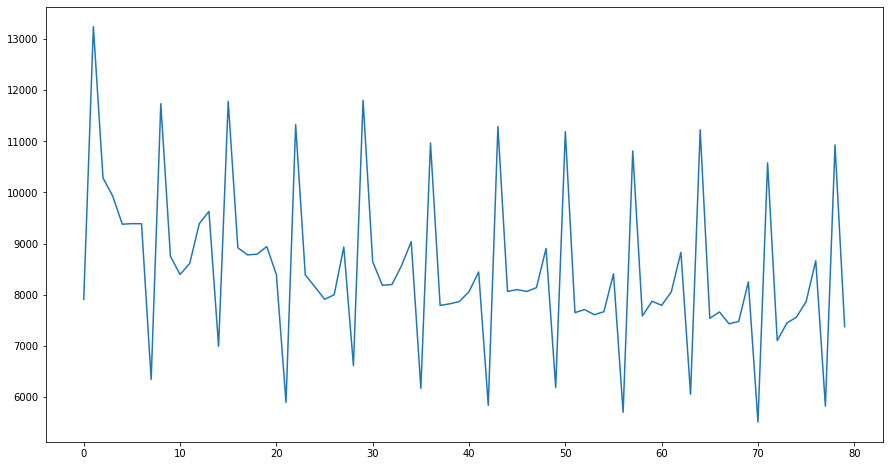

In [93]:
plt.plot(fnl_output)

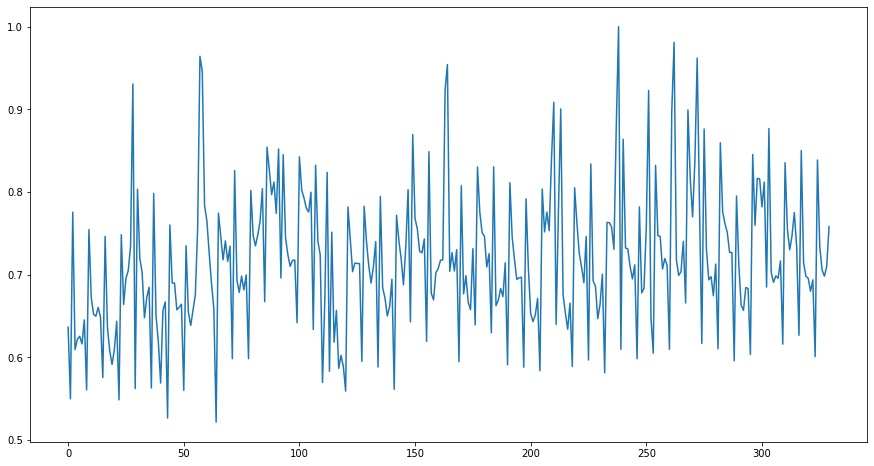

In [94]:
plt.plot(test_data)

In [95]:
day_new1=np.arange(1,331)
day_pred1=np.arange(331,411)

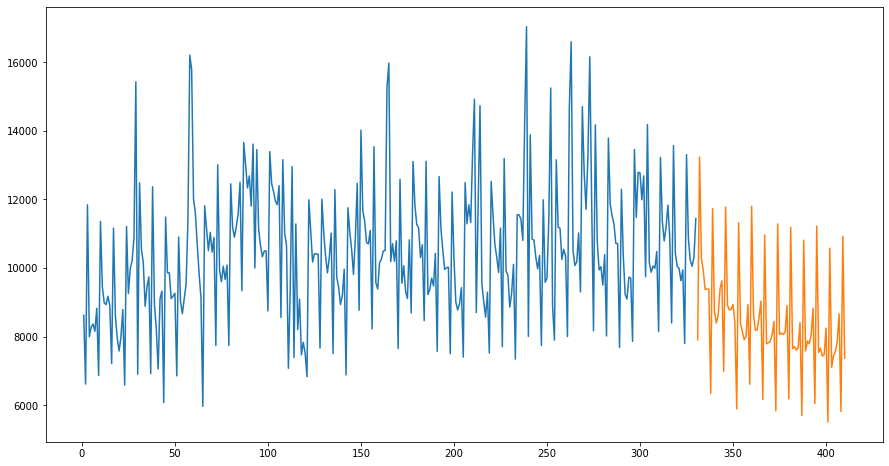

In [96]:
plt.plot(day_new1,scaler.inverse_transform(df1[612:]))
plt.plot(day_pred1,fnl_output)

In [97]:
daynew2=np.arange(1,230)
day3fore=np.arange(230,310)

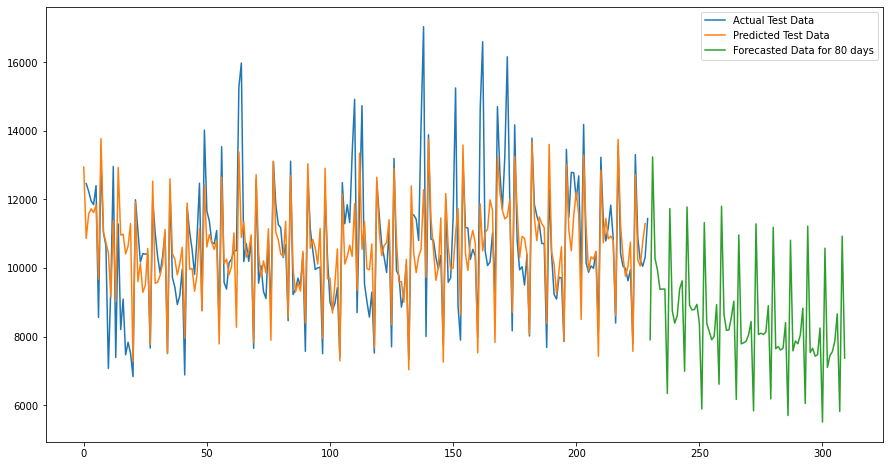

In [98]:
plt.plot(daynew2,scaler.inverse_transform(df1[713:]), label='Actual Test Data')
plt.plot(test_predict,label='Predicted Test Data')
plt.plot(day3fore,fnl_output, label='Forecasted Data for 80 days')
plt.legend()
plt.show()

In [99]:
vv=atr2.iloc[212:292]
vv.head()

,Sales
Date,
2013-08-01,8469
2013-08-02,8959
2013-08-03,6347
2013-08-04,10569
2013-08-05,7749


In [100]:
vv.tail()

,Sales
Date,
2013-10-15,7903
2013-10-16,7874
2013-10-17,7607
2013-10-18,8196
2013-10-19,5955


In [101]:
len(vv)

80

In [102]:
jj=atr2.iloc[577:657]

In [103]:
jj.head()

,Sales
Date,
2014-08-01,9702
2014-08-02,7112
2014-08-03,12606
2014-08-04,9826
2014-08-05,8937


In [104]:
jj.tail()

,Sales
Date,
2014-10-15,7060
2014-10-16,9098
2014-10-17,9329
2014-10-18,6082
2014-10-19,11486


In [105]:
len(jj)

80

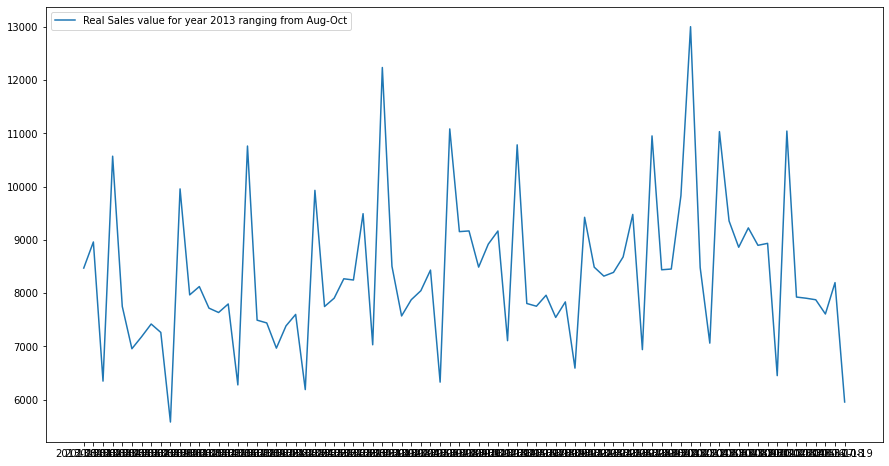

In [106]:
plt.plot(vv['Sales'], label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

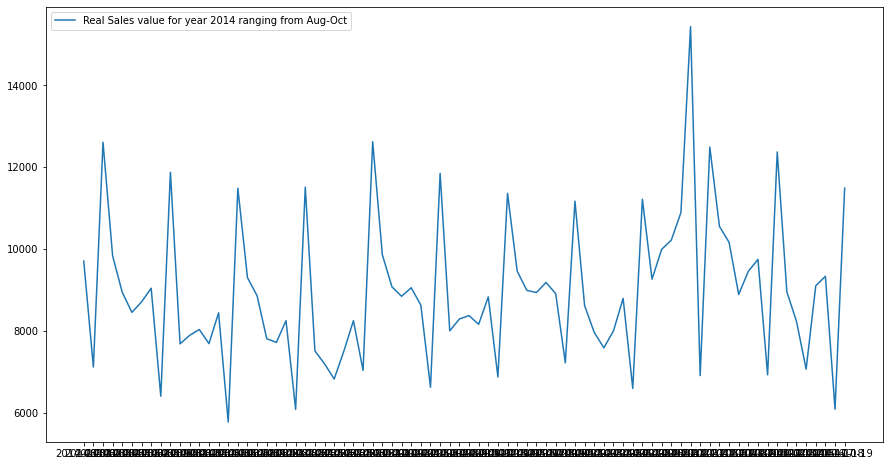

In [107]:
plt.plot(jj['Sales'],label='Real Sales value for year 2014 ranging from Aug-Oct')
plt.legend()
plt.show()

In [108]:
a1=vv.reset_index()['Sales']

In [109]:
a1

0      8469
1      8959
2      6347
3     10569
4      7749
      ...  
75     7903
76     7874
77     7607
78     8196
79     5955
Name: Sales, Length: 80, dtype: int64

In [110]:
len(a1)

80

In [111]:
b1=jj.reset_index()['Sales']

In [112]:
b1

0      9702
1      7112
2     12606
3      9826
4      8937
      ...  
75     7060
76     9098
77     9329
78     6082
79    11486
Name: Sales, Length: 80, dtype: int64

In [113]:
len(b1)

80

In [114]:
len(train_predict)

511

In [115]:
atr2.iloc[101:612]

,Sales
Date,
2013-04-12,9417
2013-04-13,7160
2013-04-14,10215
2013-04-15,8605
2013-04-16,7823
...,...
2014-08-31,12621
2014-09-01,9858
2014-09-02,9071


In [116]:
date1 = pd.date_range(start='2013/04/12', periods=511, freq='D')
date1

DatetimeIndex(['2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
               '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19',
               '2013-04-20', '2013-04-21',
               ...
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04'],
              dtype='datetime64[ns]', length=511, freq='D')

In [117]:
njc=pd.DataFrame(train_predict, columns=['Predicted Train Data'])

In [118]:
njc

,Predicted Train Data
0,10302.099609
1,10357.597656
2,8177.954102
3,10978.396484
4,9914.843750
...,...
506,6186.860840
507,11749.830078
508,9424.195312
509,9314.644531


In [119]:
njc['time_Stamp'] = pd.DataFrame(date1)

In [120]:
njc

,Predicted Train Data,time_Stamp
0,10302.099609,2013-04-12
1,10357.597656,2013-04-13
2,8177.954102,2013-04-14
3,10978.396484,2013-04-15
4,9914.843750,2013-04-16
...,...,...
506,6186.860840,2014-08-31
507,11749.830078,2014-09-01
508,9424.195312,2014-09-02
509,9314.644531,2014-09-03


In [121]:
njc=njc.set_index('time_Stamp')

In [122]:
njc

,Predicted Train Data
time_Stamp,
2013-04-12,10302.099609
2013-04-13,10357.597656
2013-04-14,8177.954102
2013-04-15,10978.396484
2013-04-16,9914.843750
...,...
2014-08-31,6186.860840
2014-09-01,11749.830078
2014-09-02,9424.195312


In [123]:
njc.iloc[111:191]

,Predicted Train Data
time_Stamp,
2013-08-01,9209.441406
2013-08-02,9028.353516
2013-08-03,9429.744141
2013-08-04,7539.298340
2013-08-05,11073.434570
...,...
2013-10-15,9040.971680
2013-10-16,8917.343750
2013-10-17,9397.497070


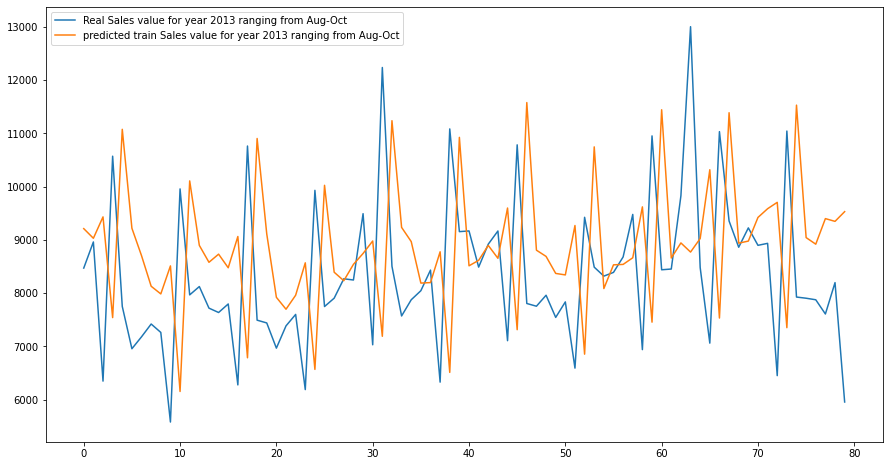

In [124]:
plt.plot(a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [125]:
daynewa=np.arange(1,81)
day3foreb=np.arange(81,161)

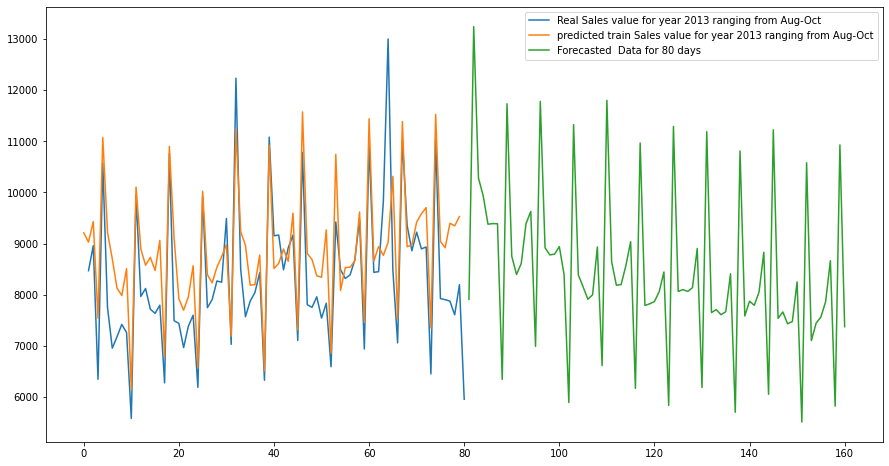

In [126]:
plt.plot(daynewa,a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.plot(day3foreb,fnl_output, label='Forecasted  Data for 80 days')
plt.legend()
plt.show()

In [127]:
nn=atr2.iloc[577:612]
nn.head()

,Sales
Date,
2014-08-01,9702
2014-08-02,7112
2014-08-03,12606
2014-08-04,9826
2014-08-05,8937


In [128]:
nn.tail()

,Sales
Date,
2014-08-31,12621
2014-09-01,9858
2014-09-02,9071
2014-09-03,8841
2014-09-04,9050


In [129]:
len(nn)

35

In [130]:
c1=nn.reset_index()['Sales']

In [131]:
c1

0      9702
1      7112
2     12606
3      9826
4      8937
5      8448
6      8704
7      9038
8      6398
9     11874
10     7679
11     7887
12     8029
13     7683
14     8438
15     5767
16    11482
17     9296
18     8853
19     7804
20     7714
21     8245
22     6077
23    11509
24     7506
25     7190
26     6820
27     7496
28     8246
29     7028
30    12621
31     9858
32     9071
33     8841
34     9050
Name: Sales, dtype: int64

In [132]:
len(c1)

35

In [133]:
njc.iloc[476:511]

,Predicted Train Data
time_Stamp,
2014-08-01,10294.448242
2014-08-02,9725.316406
2014-08-03,7623.432129
2014-08-04,12886.527344
2014-08-05,10426.584961
2014-08-06,9576.781250
2014-08-07,9174.367188
2014-08-08,9604.340820
2014-08-09,9629.958984


In [134]:
aar1=np.arange(1,36)
aar2=np.arange(36,71)

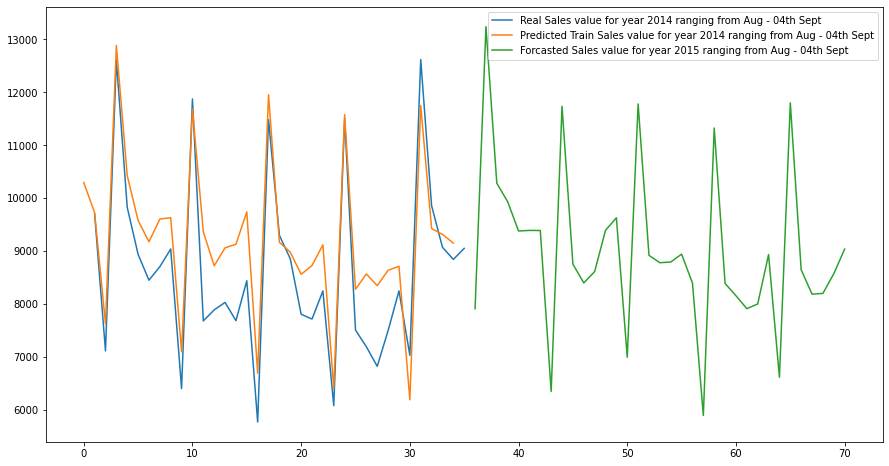

In [136]:
plt.plot(aar1,c1,label='Real Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(train_predict[476:511], label='Predicted Train Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(aar2,fnl_output[0:35], label='Forcasted Sales value for year 2015 ranging from Aug - 04th Sept')
plt.legend()
plt.show()

In [137]:
import jovian

In [138]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/ismailzain1697/lstm-model-of-store-1097


'https://jovian.ai/ismailzain1697/lstm-model-of-store-1097'